## Análisis de datos - Clase 4

### Discretización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

In [3]:
# Cargamos el dataset de ejemplo (penguins)
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
# Seleccionamos una variable continua para discretizar
variable = "bill_length_mm"

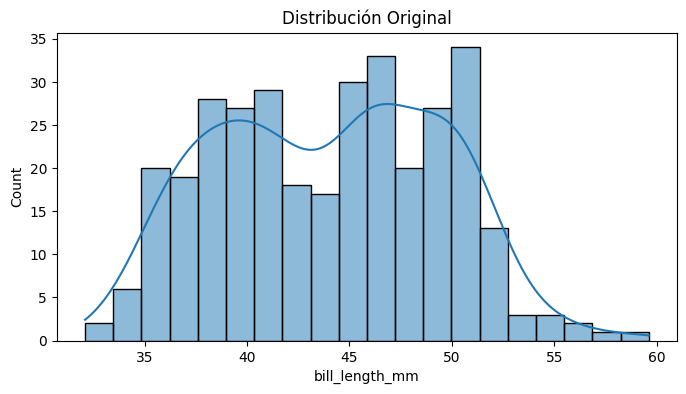

In [5]:
# Visualizamos la distribución original
fig, ax = plt.subplots(figsize=(8,4))

sns.histplot(penguins[variable], bins=20, kde=True, ax=ax)
ax.set_title("Distribución Original")
plt.show()

#### Por intervalos iguales

In [6]:
# Discretización por intervalos de igual amplitud
penguins["equal_width"] = pd.cut(penguins[variable], bins=4, labels=["Corto", "Medio", "Largo", "Muy Largo"])
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto


#### por intervalos de igual frecuencia

In [7]:
# Discretización por intervalos de igual frecuencia
#penguins["equal_freq"] = pd.qcut(penguins[variable], q=4, labels=["Muy Corto", "Corto", "Medio", "Largo"])
penguins["equal_freq"], bins = pd.qcut(penguins[variable], q=4, labels=["Muy Corto", "Corto", "Medio", "Largo"], retbins=True)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto


#### Discretización por puntos de corte

In [8]:
# uniforme y cuantiles

kbin_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
penguins["kbin_quantile"] = kbin_quantile.fit_transform(penguins[[variable]]).astype(int)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto,0
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto,1
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto,0


#### Con K-means

In [9]:
# K-means

kbin_kmeans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
penguins["kbin_kmeans"] = kbin_kmeans.fit_transform(penguins[[variable]]).astype(int)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,equal_width,equal_freq,kbin_quantile,kbin_kmeans
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Medio,Muy Corto,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Medio,Muy Corto,1,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Medio,Corto,1,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Corto,Muy Corto,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Medio,Muy Corto,0,1
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,Corto,Muy Corto,0,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,Medio,Muy Corto,0,1
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,Medio,Corto,1,1
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,Corto,Muy Corto,0,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,Corto,Muy Corto,0,0


#### Comparación de resultados

In [10]:
# Resultados
penguins_disc = penguins[[variable, "equal_width", "equal_freq", "kbin_quantile", "kbin_kmeans"]]
penguins_disc

,bill_length_mm,equal_width,equal_freq,kbin_quantile,kbin_kmeans
0,39.1,Medio,Muy Corto,0,1
1,39.5,Medio,Muy Corto,1,1
2,40.3,Medio,Corto,1,1
4,36.7,Corto,Muy Corto,0,0
5,39.3,Medio,Muy Corto,0,1
...,...,...,...,...,...
338,47.2,Largo,Medio,2,2
340,46.8,Largo,Medio,2,2
341,50.4,Largo,Largo,3,3
342,45.2,Medio,Medio,2,2


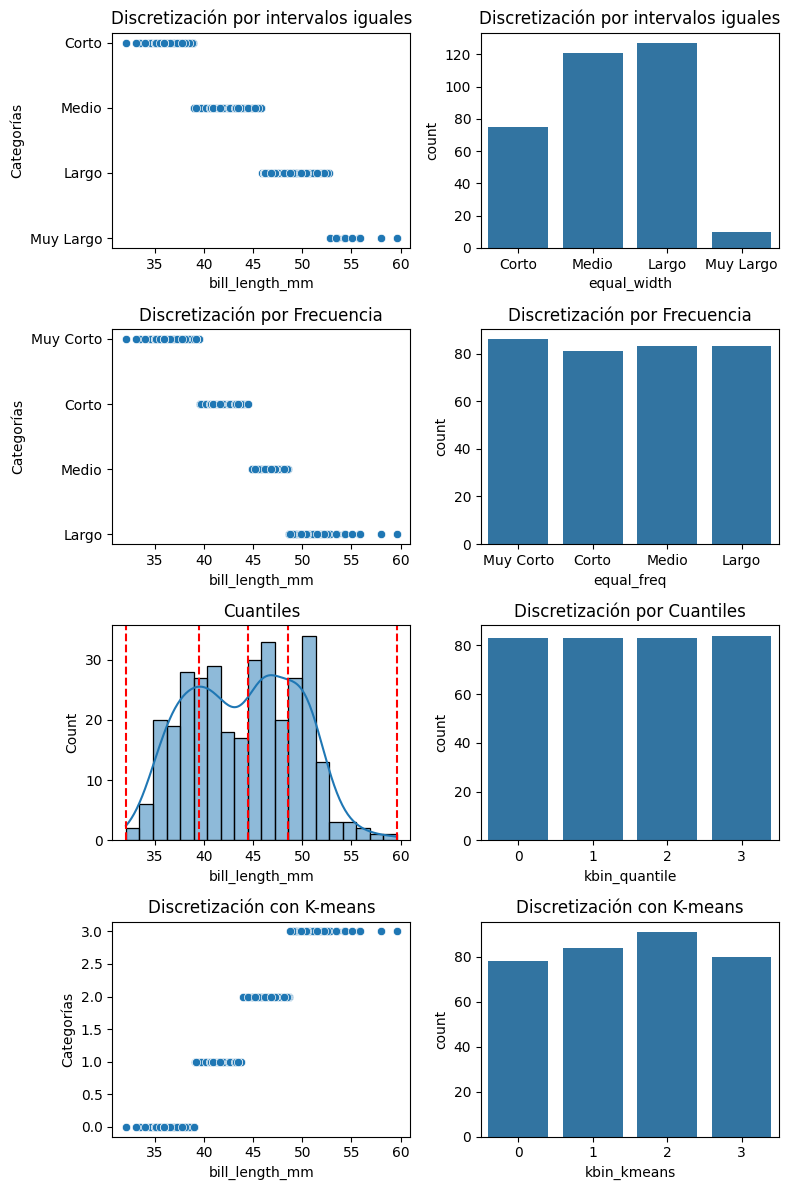

In [11]:
# Visualizamos las discretizaciones

# Visualizamos la distribución original y la discretizada
fig, axes = plt.subplots(4,2, figsize=(8,12))

# Discretización por intervalos iguales
sns.scatterplot(x=penguins[variable], y=penguins["equal_width"], ax=axes[0,0])
axes[0,0].set_title('Discretización por intervalos iguales')
axes[0,0].set_xlabel(variable)
axes[0,0].set_ylabel('Categorías')

sns.countplot(x=penguins["equal_width"], order=["Corto", "Medio", "Largo", "Muy Largo"], ax=axes[0,1])
axes[0,1].set_title('Discretización por intervalos iguales')


# Discretización por Frecuencia
sns.scatterplot(x=penguins[variable], y=penguins["equal_freq"], ax=axes[1,0])
axes[1,0].set_title('Discretización por Frecuencia')
axes[1,0].set_xlabel(variable)
axes[1,0].set_ylabel('Categorías')

sns.countplot(x=penguins["equal_freq"], order=["Muy Corto", "Corto", "Medio", "Largo"], ax=axes[1,1])
axes[1,1].set_title("Discretización por Frecuencia")


# Discretización por Cuantiles
sns.histplot(penguins[variable], bins=20, kde=True, ax=axes[2,0])
for b in bins:
    axes[2,0].axvline(b, color='red', linestyle='dashed')
axes[2,0].set_title("Cuantiles")

sns.countplot(x=penguins["kbin_quantile"], ax=axes[2,1])
axes[2, 1].set_title("Discretización por Cuantiles")


# Discretización con K-means
sns.scatterplot(x=penguins[variable], y=penguins["kbin_kmeans"], ax=axes[3,0])
axes[3,0].set_title('Discretización con K-means')
axes[3,0].set_xlabel(variable)
axes[3,0].set_ylabel('Categorías')

sns.countplot(x=penguins["kbin_kmeans"], ax=axes[3,1])
axes[3,1].set_title("Discretización con K-means")


plt.tight_layout()
plt.show()